# Python for Data & Analytics - Lesson 4 
## Lesson 2 Homework Solution

In [1]:
def my_sort(my_list, ascending):
    # This function received a list and a boolean argument and returns a sorted list. The sort order
    # is ascending if the boolean is True and decending if it's False.
    num_list = my_list.copy() # The sent list is copied so that any manipulation doesn't affect the
                              # original one.
    sorted_list = []

    # syntax for if/else in one line: variable = <value if true> if <condition> else <value if false>
    next_item_finder_func = min if ascending else max # assigning the relevant function to a variable

    while len(num_list) > 0:
        num_list, sorted_list = move_next_item(num_list, sorted_list, next_item_finder_func)
    return sorted_list

def move_next_item(num_list, sorted_list, next_item_finder_func):
    # This function finds an item using the function in the next_item_finder_func argument, and
    # moves the item from the original to the end of the sorted list. 
    item_to_move = next_item_finder_func(num_list)
    sorted_list.append(item_to_move)
    del num_list[num_list.index(item_to_move)] # the list.index() method returns the index of an item
                                               # in a list
    return num_list, sorted_list
        

In [2]:
my_list = [2, 4, 0.3, 6, 0, 1, 3.465, 8, 1.5, 9]

my_sort(my_list, False)

[9, 8, 6, 4, 3.465, 2, 1.5, 1, 0.3, 0]

In [3]:
my_sort(my_list, True)

[0, 0.3, 1, 1.5, 2, 3.465, 4, 6, 8, 9]

## Packages & Modules
You can take a deeper look at the [Python's import system](https://docs.python.org/3/reference/import.html).

In [3]:
sqrt(4)

2.0

In [2]:
# Import a specific module from a package
from math import sqrt

sqrt(9)

3.0

In [5]:
# Import a module from a subpackage
from scipy.stats import describe

describe(my_list)

DescribeResult(nobs=10, minmax=(0.0, 9.0), mean=3.5265, variance=10.220466944444443, skewness=0.5853295207513787, kurtosis=-1.0361895866064352)

In [6]:
# Import an entire package
import math

math.log(9, 3) # find the log of 9 with base 3

2.0

In [7]:
# 'log' is only accessible as a module in 'math'
log(9, 3)

NameError: name 'log' is not defined

In [ ]:
# Import all the modules from a package
from math import *

log(9, 3)

### The Danger of Importing Everything

In [ ]:
def trunc(my_str):
    return my_str[:-1]

trunc('hello')

In [ ]:
from math import *

trunc('hello')

In [ ]:
# The 'trunc' function from 'math' is now bound to the 'trunc' identifier
help(trunc)

### The Zen of Python [Easter Egg](https://en.wikipedia.org/wiki/Easter_egg_(media))

In [4]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## The Main Data Science Packages
**The Basic Toolkit**
* **NumPy** - supports large, multidimentional arrays and matrices along with a large collection of mathematical functions to operate on these arrays. Numpy arrays allow for efficient large-scale computation and most of the tools below are built on top of them.
* **Pandas** - provides tools for data manipulation and analysis, most notably dataframes.
* **Scikit-learn** (aka sklearn) - provides machine learning functionality.
* **Matplotlib, Seaborn** - support data visualization.
* Other useful scientific computing packages: **scipy, math, statsmodels**.

**Specialized Machine Learning Libraries**
* **XGBoost, CatBoost, LightGBM** - Gradient boosting machines (only XGBoost is currently in our stack).
* **PyTorch, TensorFlow, FastAI, Keras** - Deep learning (not yet in our stack).
* **SpaCy, NLTK, Gensim** - Natural Language Processing (only NLTK is in our stack).

### NumPy Arrays
Check out this [numpy tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html).

In [5]:
# You can create an alias to an imported module
import numpy as np # np is the standard alias for numpy
np.__version__ # Here's how you check a version of an external module

'1.19.5'

In [6]:
# Here is a numpy array. Note that we refer to the module using the alias.
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [7]:
# Unlike lists, arrays can only have one data type. Here numpy converts everything to string to
# enforce this constraint.
a = np.array([1, 2, 'three'])
a

array(['1', '2', 'three'], dtype='<U11')

In [8]:
a = np.arange(15) 
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [9]:
matrix_1 = a.reshape(3, 5)
matrix_1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [11]:
matrix_2 = np.ones((3, 5), dtype=np.float32 ) # numpy uses its own int data type
matrix_2

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [12]:
# We can use simple operations on arrays and matrices.
matrix_1 + matrix_2

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15.]])

In [13]:
# This is how we multiply each element separately.
matrix_1 * matrix_2

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.]])

In [14]:
matrix_2.T

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [15]:
matrix_1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [16]:
# This is how we do matrix multiplication (aka the dot product).
matrix_1 @ matrix_2.T # We transpose one of the matrices to make the dimensions fit 

array([[10., 10., 10.],
       [35., 35., 35.],
       [60., 60., 60.]])

## Pandas
Check out these [pandas tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html).

In [1]:
import pandas as pd # pd is the standard alias for pandas

# Here we read the dataset from a CSV file online.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                names=['petal length', 'petal width', 'sepal length', 'sepal width', 'species'])
df.head()

,petal length,petal width,sepal length,sepal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a classic, simple dataset for machine learning classification tasks.

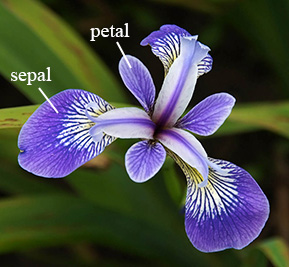

In [2]:
# This is how we get some basic statistics on numeric features
df.describe()

,petal length,petal width,sepal length,sepal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
def my_describe(df):
    df_describe = df.describe()
    df_describe = df_describe.append(df.mode().loc[0, df_describe.columns])
    df_describe = df_describe.rename(index={0:'mode'})
    return df_describe

my_describe(df)

,petal length,petal width,sepal length,sepal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
mode,5.000000,3.000000,1.500000,0.200000


In [4]:
# One column in a dataframe is a series. Here is how we refer to it: 
df.tail(10) # We use the .head() method to limit our output. See what happens when 
                         # you remove it.

,petal length,petal width,sepal length,sepal width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# There are multiple ways to index and slice series and dataframes. Here we're using '.loc'  
df.loc[10:20, 'petal length'] # We first refer to rows, then to columns.

10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
Name: petal length, dtype: float64

In [6]:
# This is a good way to get a basic sense of what a categorical feature looks like. 
df['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [7]:
# How about this fancy correlation matrix? 
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,petal length,petal width,sepal length,sepal width
petal length,1.00,-0.11,0.87,0.82
petal width,-0.11,1.00,-0.42,-0.36
sepal length,0.87,-0.42,1.00,0.96
sepal width,0.82,-0.36,0.96,1.00


In [8]:
# We can filter series and dataframes by specific values
df[df['species']=='Iris-versicolor'].head()

,petal length,petal width,sepal length,sepal width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [17]:
def multiply_by_2(x):
    return 2 * x

multiply_by_2(3)

6

In [18]:
times_2 = multiply_by_2
times_2(3)

6

In [19]:
times_2 = lambda x: 2 * x
times_2(3)

6

In [16]:
df['petal length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: petal length, dtype: float64

In [25]:
df['petal length'].apply(lambda y: y * 2).head()

0    10.2
1     9.8
2     9.4
3     9.2
4    10.0
Name: petal length, dtype: float64

In [27]:
df['petal length'] * 2

0      10.2
1       9.8
2       9.4
3       9.2
4      10.0
       ... 
145    13.4
146    12.6
147    13.0
148    12.4
149    11.8
Name: petal length, Length: 150, dtype: float64

### Research Question - Is Iris Setosa's Petal Length Differet than Iris Versicolor's? 

In [9]:
# Let's start by assigning the petal lengths of Seotsa and Versicolor to variables
setosa_petal_lengths = df.loc[df['species']=='Iris-setosa', 'petal length']
versicolor_petal_lengths = df.loc[df['species']=='Iris-versicolor', 'petal length']
setosa_petal_lengths.head() # This is what the resulting series looks like

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: petal length, dtype: float64

In [10]:
# Let's look at their means
setosa_petal_lengths.mean(), versicolor_petal_lengths.mean()

(5.006, 5.936)

In [30]:
# Now, let's conduct a t-test
from scipy.stats import ttest_ind # t-test for two independent samples

ttest_ind(setosa_petal_lengths, versicolor_petal_lengths) # ttest_ind() takes numpy arrays as 
            # arguments. Conveniently, the function converts our series objects to arrays behind
            # the scenes.

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

Yes, we can confidently reject the null hypothesis that the petal length averages are identical!

## Matplotlib
Check out this [Matplotlib Tutorial](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py).

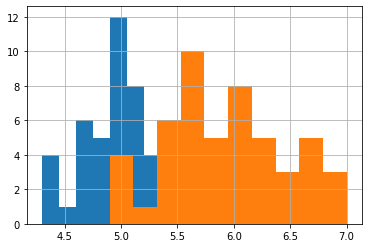

In [31]:
# Here's a simple histogram with matplotlib, relying on its integration with pandas
import matplotlib.pyplot as plt # plt is the standard alias for the pyplot module

_ = setosa_petal_lengths.hist(), versicolor_petal_lengths.hist()

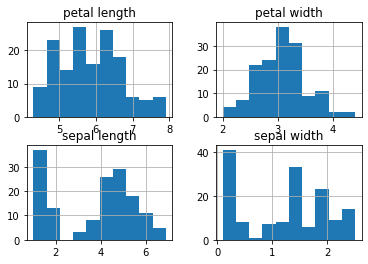

In [33]:
_ = df.hist()

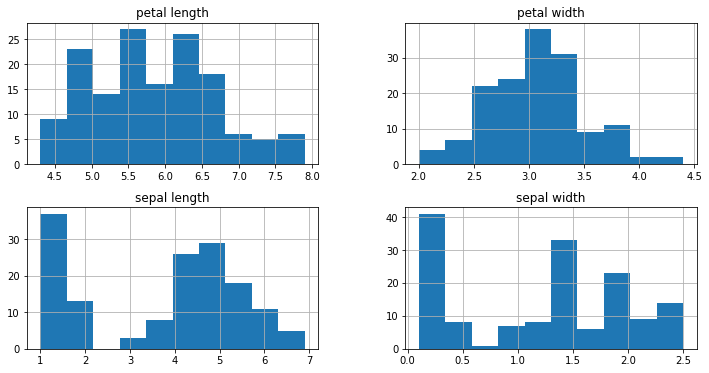

In [34]:
# That was a little too small. Let's increase the figure's size. I also don't want the array details
# to be presented.
_ = df.hist(figsize=(12, 6)) # We assign a return value (here the array details) to '_' when we   
                             # don't intend to use it.

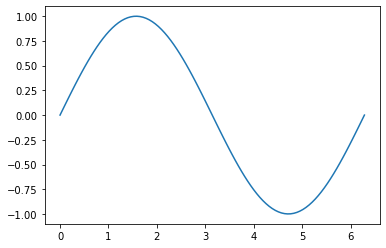

In [36]:
import numpy as np

x = np.linspace(0, 2 * np.pi, 100) # 100 numbers between 0 and 2 Pi. This is useful to evaluate 
                                   # a function at lots of points.
f = np.sin(x)

_ = plt.plot(x, f)

## Scikit-learn
Check out these [scikit-learn tutorials](https://scikit-learn.org/stable/tutorial/index.html).

In [37]:
# Divide data into train and test sets
from sklearn.model_selection import train_test_split

X = df[['petal length', 'petal width', 'sepal length', 'sepal width']] # These are the predictors.
y = df['species'] # This is the tarrget we're trying to predict.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [38]:
# Let's train a random forest classifier with default parameters
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100) # create the classifier
rf.fit(X_train, y_train) # train the classifier
rf.score(X_test, y_test) # evaluate the model using the test set

0.9736842105263158

In [40]:
# Let's make it more readable
print("Test Score: %.3f" % rf.score(X_test, y_test))

Test Score: 0.974


Check out more [output formatting techniques](https://www.geeksforgeeks.org/python-output-formatting/).

In [41]:
# This is what the test set looks like. Notice that the indexes are shuffled.
X_test.head()

,petal length,petal width,sepal length,sepal width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [42]:
# This is what the predictions look like
rf.predict(X_test.head())

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype=object)

In [19]:
# These are the real classes
y_test.head()

NameError: name 'y_test' is not defined

In [43]:
# We can display this information more effectively by using a dataframe
df_predict_demo = X_test.copy() # copying the test set predictors to a new dataframe
df_predict_demo['predicted species'] = rf.predict(X_test) # creating a column with the predicitons
df_predict_demo['true species'] = y_test # and a column with the true values
df_predict_demo.head()

,petal length,petal width,sepal length,sepal width,predicted species,true species
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa


## Homework - a Card Game!
Write a function that plays simple card game. The function: 

1) recieves as arguments the number of players and the number of rounds, 

2) creates a virtual card deck with *n_players* * *n_rounds* consecutive integers (no different colors), 

3) divides the cards randomly among the players (check out the *random* package for a way to shuffle your deck), 

4) plays each round, and 

5) prints the final results.

The output should look something like this:

In [2]:
from py4dna import play_card_game # This is a module I wrote for you

play_card_game(n_players=2, n_rounds=5)

The Dealt Cards: 

Player 1 : [2, 1, 5, 7, 6]
Player 2 : [4, 3, 8, 9, 10]

Round 1 : [2, 4] - the winner is player 2
Round 2 : [1, 3] - the winner is player 2
Round 3 : [5, 8] - the winner is player 2
Round 4 : [7, 9] - the winner is player 2
Round 5 : [6, 10] - the winner is player 2

Final score: [0, 5]
